In [1]:
import scipy.io
import matplotlib.pyplot as plt
%matplotlib notebook
import ast
import numpy as np
from scipy.ndimage import gaussian_filter1d
import pandas as pd
import math

<IPython.core.display.Javascript object>


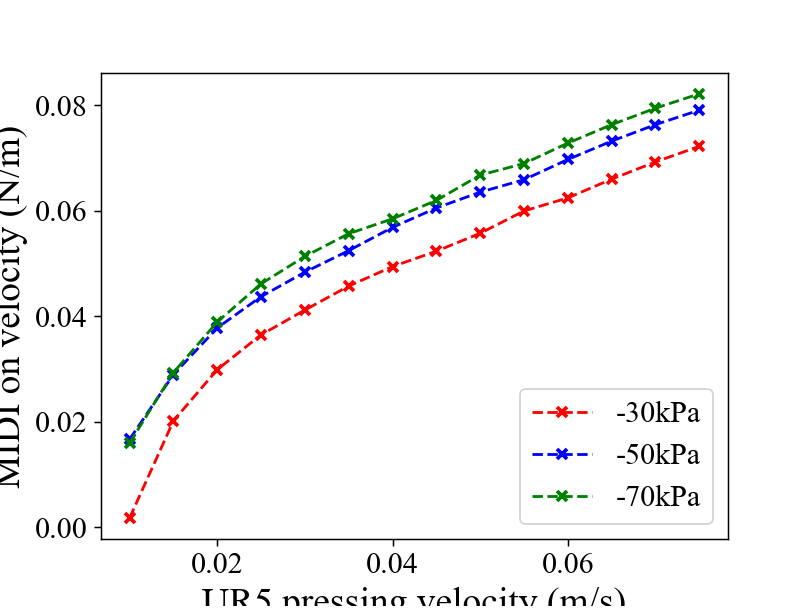

<IPython.core.display.Javascript object>


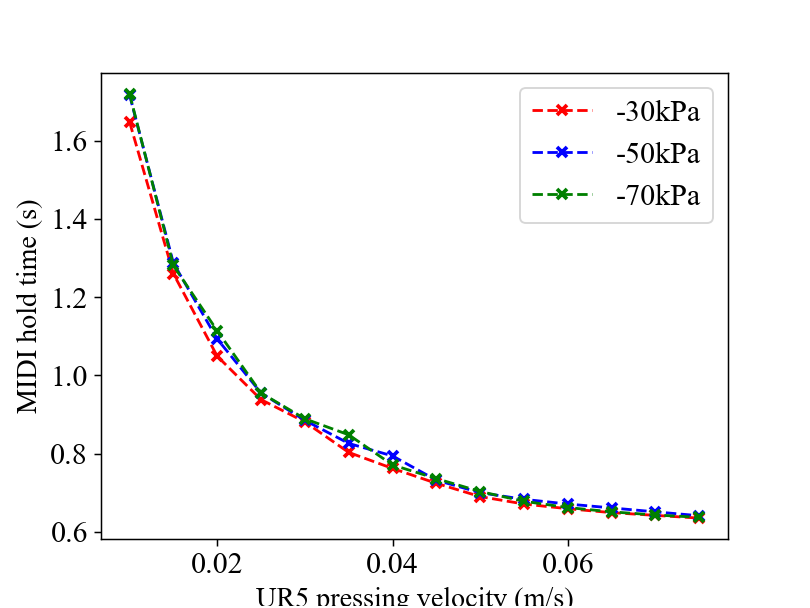

In [95]:
start = 0
end = -1
mat = scipy.io.loadmat('../model/model_midi_new_zzz_thres_1_updated_param.mat')
vel_list = np.linspace(0.01,0.08,15)
pressure_list = [30,50,70]
# pressure_list = [0,40,80]

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size': 16})

fig = plt.figure(1,figsize=(6, 4.5))
color_list = ['r','b','g','m']

# norm_on_vel = [(math.log(e)+7.1)*18 for e in mat['midi_all']]
norm_on_vel = [e for e in mat['midi_all']]
for i in range(len(pressure_list)):
#     print(midi_down_list[i])
#     print(list(np.round(vel_list,3)))
    plt.plot(list(np.round(vel_list,3))[start:end], norm_on_vel[15*(i):(15*(i+1))][start:end],label = str(-pressure_list[i])+'kPa',marker = 'x', ms = 5, mec=color_list[i],mfc = color_list[i],mew=2,linestyle = 'dashed',color=color_list[i])
#     plt.plot(list(np.round(vel_list,3)), [e for e in mat['midi_all']][15*(i):(15*(i+1))],label = str(-pressure_list[i]),marker = 'x', ms = 5, mec=color_list[i],mfc = color_list[i],mew=2,linestyle = 'dashed',color=color_list[i])
    plt.legend(loc='lower right')    

plt.xlabel('UR5 pressing velocity (m/s)', fontsize=20)
plt.ylabel('MIDI on velocity (N/m)', fontsize=20)
# plt.ylim([0,0.005])
# plt.grid(linestyle = '--', linewidth = 0.5)
# plt.title('Predicted MIDI on velocity')
plt.savefig("new figs/model_midi_zzz.jpg",bbox_inches = 'tight')
plt.show()

fig = plt.figure(2,figsize=(6, 4.5))
color_list = ['r','b','g','m']
# norm_ht = [(math.log(e)-0.2)*2.8 for e in mat['hold_time_all']]
# norm_ht = [(e-0.2)*2.8-0.5 for e in mat['hold_time_all']]
norm_ht = [e for e in mat['hold_time_all']]
for i in range(len(pressure_list)):
#     print(midi_down_list[i])
#     print(list(np.round(vel_list,3)))
    plt.plot(list(np.round(vel_list,3))[start:end], norm_ht[15*(i):(15*(i+1))][start:end],label = str(-pressure_list[i])+'kPa',marker = 'x', ms = 5, mec=color_list[i],mfc = color_list[i],mew=2,linestyle = 'dashed',color=color_list[i])
    plt.legend(loc='upper right')    

plt.xlabel('UR5 pressing velocity (m/s)',fontsize=15)
plt.ylabel('MIDI hold time (s)',fontsize=15)
# plt.ylim([0,0.002])
# plt.grid(linestyle = '--', linewidth = 0.5)
# plt.title('Predicted MIDI hold time')
plt.savefig("new figs/model_midi_ht_zzz.jpg",bbox_inches = 'tight')
plt.show()

In [4]:
def get_seq_derivative(seq):
    der = []
    # camera frequency 120Hz
    dt = 1/120
    
    for i in range(1,len(seq)):
        der.append((seq[i]-seq[i-1])/dt)
    
    der.insert(0,der[0])
    
    return der

<IPython.core.display.Javascript object>


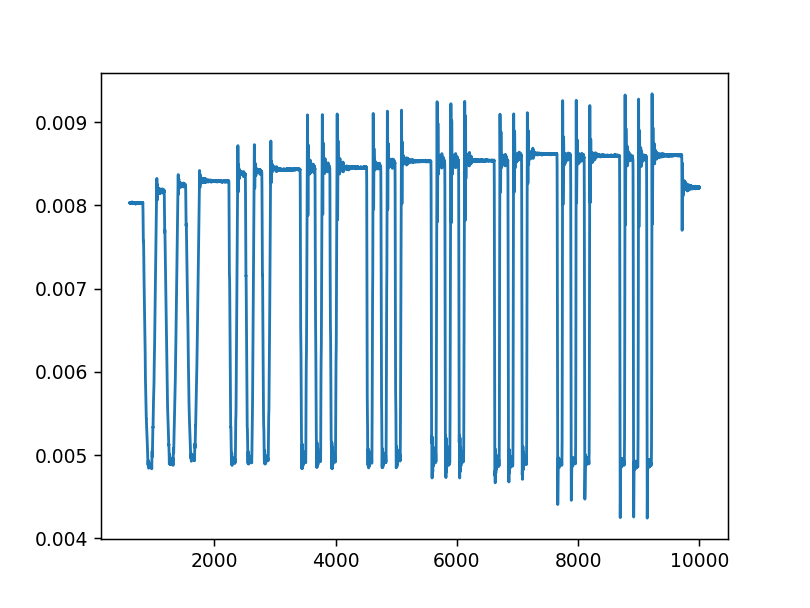

<IPython.core.display.Javascript object>


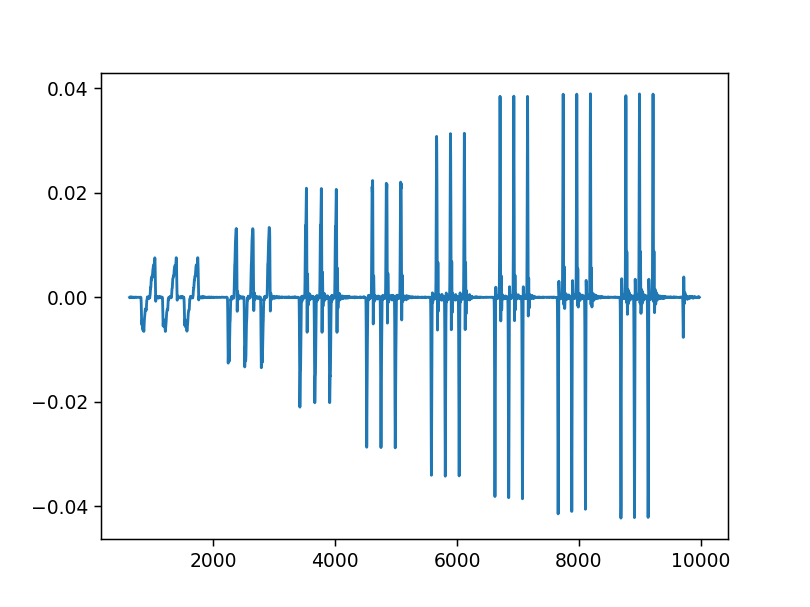

In [62]:
df = pd.read_csv('../paper_data/zzz/zzz30.csv', skiprows = 6,usecols=[1,3,6,9,12])
# Y,Y.1,Y.2,Y.3
# UR5,fin mid, fin tip, key
# df['diff_ur_fin'] = df['Y']-df['Y.1']
# df['diff_ur_fin_filtered'] = gaussian_filter1d(df['diff_ur_fin'], sigma=2, truncate=4)
start = 600
end = 10000

name = ['Y','Y.1','Y.2','Y.3']
for n in name:
#     df[n+'f'] = gaussian_filter1d(df[n], sigma=1, truncate=6)
    df[n+'f'] = df[n]
    df[n] = df[n][start:end]
    

fig = plt.figure(3,figsize=(6, 4.5))
# plt.subplot(4,1,1)
# plt.plot(df['Y'][start:end])
# plt.subplot(4,1,2)
# plt.plot(df['Y.1'][start:end])
# plt.subplot(4,1,3)
# plt.plot(df['Y.2'][start:end])
# plt.subplot(4,1,4)
plt.plot(df['Y.3'])
fig = plt.figure(4,figsize=(6, 4.5))
# plt.subplot(4,1,4)
v_pia = gaussian_filter1d(get_seq_derivative(df['Y.3']), sigma=4, truncate=6)
plt.plot(v_pia)
plt.show()

In [63]:
thre_points = []
i = 0
last_i = 0
thre = 0.00821
thre -= 0.001
for e in df['Y.3']:
    if abs(e-thre)<1*10e-5 and (i-last_i)>100 and v_pia[i]<0:
        thre_points.append(i)
        last_i = i
    i +=1
    
fig = plt.figure(5,figsize=(6, 4.5))
plt.plot(df['Y.3'])
for idx in thre_points[::2]:
    plt.scatter(idx,df['Y.3'][idx])
plt.show()
print(thre_points[::2])    

[836, 1545, 2517, 3909, 5577, 6620, 8104]


<IPython.core.display.Javascript object>


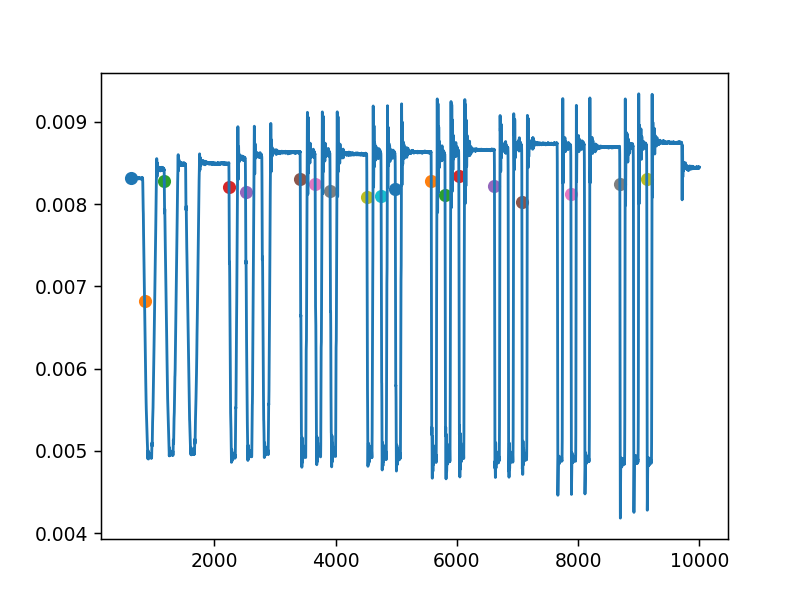

[625, 847, 1173, 2241, 2513, 3416, 3662, 3908, 4515, 4750, 4984, 5577, 5805, 6032, 6620, 7072, 7881, 8688, 9132]


In [68]:
thre_points = []
i = 0
last_i = 0
thre = 0.00835
thre -= 0.001
for e in df['Y.3']:
    if abs(e-thre)<10e-4 and (i-last_i)>100 and v_pia[i]<0:
        thre_points.append(i)
        last_i = i
    i +=1
    
fig = plt.figure(8,figsize=(6, 4.5))
plt.plot(df['Y.3'])
for idx in thre_points[::2]:
    plt.scatter(idx,df['Y.3'][idx])
plt.show()
print(thre_points[::2])        

In [65]:
midi_poz_30 = [836, 1170, 1545,2220, 2517,2780,3380,3640, 3909,4490,4710,4960, 5577, 5780,6010,6620,6830,7050,7630,7880,8104,8660,8900,9133]
midi_poz_50 = [833, 1170, 1542,2220, 2516, 2780, 3419,3670, 3910,4490, 4752,4960, 5579,5780,6010, 6622,6830,7050, 7659,7880, 8106, 8660,8914,9100]
midi_poz_70 = []
midi_l = [midi_poz_30,midi_poz_50]
p_l = [30,50]
gt_l = []

for i in range(len(midi_l)):
    df = pd.read_csv('../paper_data/zzz/zzz'+str(p_l[i])+'.csv', skiprows = 6,usecols=[1,3,6,9,12])
    start = 600
    end = 10000

    df['Y.3'] = df['Y.3'][start:end]

#     fig = plt.figure(3,figsize=(6, 4.5))
#     plt.plot(df['Y.3'])
#     fig = plt.figure(4,figsize=(6, 4.5))
    # plt.subplot(4,1,4)
    v_pia = gaussian_filter1d(get_seq_derivative(df['Y.3']), sigma=4, truncate=6)
    gt = []
    for m in midi_l[i]:
        gt.append(abs(v_pia[m]))
    gt_l.append(gt)



<IPython.core.display.Javascript object>


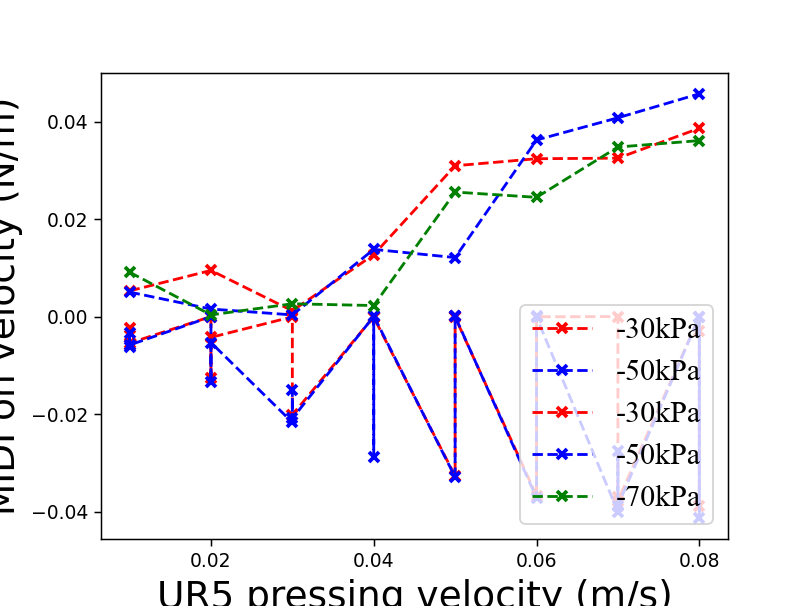

In [67]:
# norm_on_vel = [(math.log(e)+7.1)*18 for e in mat['midi_all']]
# norm_on_vel = [e for e in mat['midi_all']]
fig = plt.figure(6,figsize=(6, 4.5))
color_list = ['r','b','g','m']
vel_list_1 = np.linspace(0.01,0.08,8)
vel_list = []
for v in vel_list_1:
    vel_list.append(v)
    vel_list.append(v)
    vel_list.append(v)

start = 0

for i in range(len(p_l)):
#     print(midi_down_list[i])
#     print(list(np.round(vel_list,3)))
    plt.plot(list(np.round(vel_list,3))[start:], gt_l[i][start:],label = str(-p_l[i])+'kPa',marker = 'x', ms = 5, mec=color_list[i],mfc = color_list[i],mew=2,linestyle = 'dashed',color=color_list[i])
#     plt.plot(list(np.round(vel_list,3)), [e for e in mat['midi_all']][15*(i):(15*(i+1))],label = str(-pressure_list[i]),marker = 'x', ms = 5, mec=color_list[i],mfc = color_list[i],mew=2,linestyle = 'dashed',color=color_list[i])
    plt.legend(loc='lower right')    

plt.xlabel('UR5 pressing velocity (m/s)', fontsize=20)
plt.ylabel('MIDI on velocity (N/m)', fontsize=20)
# plt.ylim([9,53])
# plt.grid(linestyle = '--', linewidth = 0.5)
# plt.title('Predicted MIDI on velocity')
plt.savefig("new figs/gt_midi_zzz.jpg",bbox_inches = 'tight')
plt.show()


In [60]:
np.linspace(0.01,0.08,8)

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08])

In [70]:
poz_down_30 = [848,2252,3425,4521,5582,6625,7662,8693]
poz_up_30 = [1031,2379,3531,4619,5672,6712,7748,8778]

poz_down_50 = [844,2250,3424,4522,5585,6627,7664,8695]
poz_up_50 = [1030,2379,3530,4621,5673,6714,7750,8781]

poz_down_70 = [1501,2906,4081,5179,6241,7283,8319,9350]
poz_up_70 = [1689,3035,4186,5276,6330,7369,8404,9434]

<IPython.core.display.Javascript object>


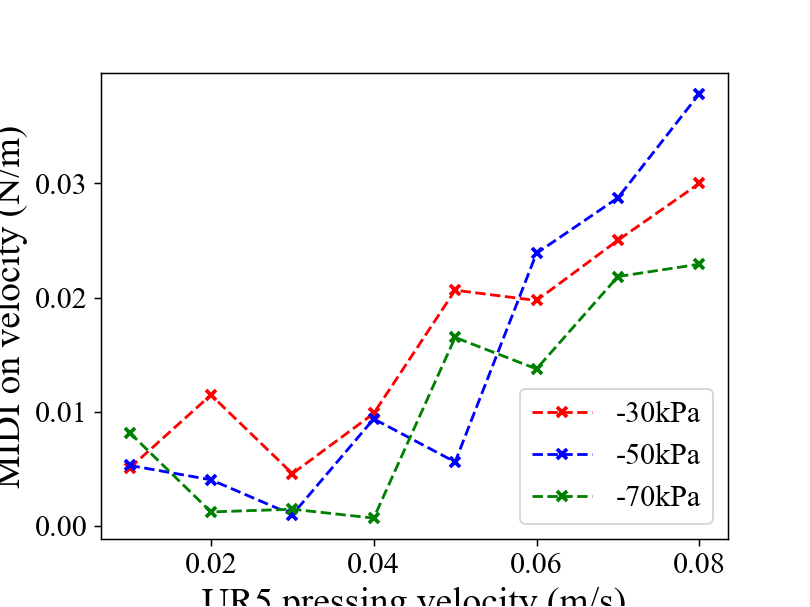

In [76]:
def get_seq_derivative(seq):
    der = []
    # camera frequency 120Hz
    dt = 1/120
    
    for i in range(1,len(seq)-1):
        der.append((seq[i+1]-seq[i-1])/(2*dt))
    
    der.insert(0,der[0])
    
    return der

poz_down_l = [poz_down_30,poz_down_50,poz_down_70]
poz_up_l = [poz_up_30,poz_up_50,poz_up_70]
p_l = [30,50,70]
gtv_l = []
gtht_l = []

for i in range(len(p_l)):
    df = pd.read_csv('../paper_data/zzz/zzz'+str(p_l[i])+'.csv', skiprows = 6,usecols=[1,3,6,9,12])

    v_pia = get_seq_derivative(df['Y.3'])
    gtv = []
    gtht = []
    for j in range(8):
        gtv.append(abs(v_pia[poz_down_l[i][j]]))
        gtht.append(round((poz_up_l[i][j]-poz_down_l[i][j])/120,2))
    gtv_l.append(gtv)
    gtht_l.append(gtht)
    
# norm_on_vel = [(math.log(e)+7.1)*18 for e in mat['midi_all']]
# norm_on_vel = [e for e in mat['midi_all']]
fig = plt.figure(10,figsize=(6, 4.5))
color_list = ['r','b','g','m']
vel_list = np.linspace(0.01,0.08,8)

start = 0

for i in range(len(p_l)):
#     print(midi_down_list[i])
#     print(list(np.round(vel_list,3)))
    plt.plot(list(np.round(vel_list,3))[start:], gtv_l[i][start:],label = str(-p_l[i])+'kPa',marker = 'x', ms = 5, mec=color_list[i],mfc = color_list[i],mew=2,linestyle = 'dashed',color=color_list[i])
#     plt.plot(list(np.round(vel_list,3)), [e for e in mat['midi_all']][15*(i):(15*(i+1))],label = str(-pressure_list[i]),marker = 'x', ms = 5, mec=color_list[i],mfc = color_list[i],mew=2,linestyle = 'dashed',color=color_list[i])
    plt.legend(loc='lower right')    

plt.xlabel('UR5 pressing velocity (m/s)', fontsize=20)
plt.ylabel('MIDI on velocity (N/m)', fontsize=20)
# plt.ylim([9,53])
# plt.grid(linestyle = '--', linewidth = 0.5)
# plt.title('Predicted MIDI on velocity')
plt.savefig("new figs/gt_midi_zzz.jpg",bbox_inches = 'tight')
plt.show()

<IPython.core.display.Javascript object>


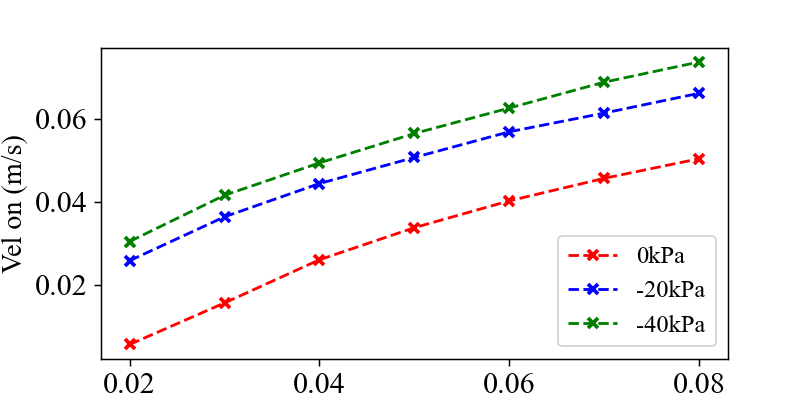

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<IPython.core.display.Javascript object>


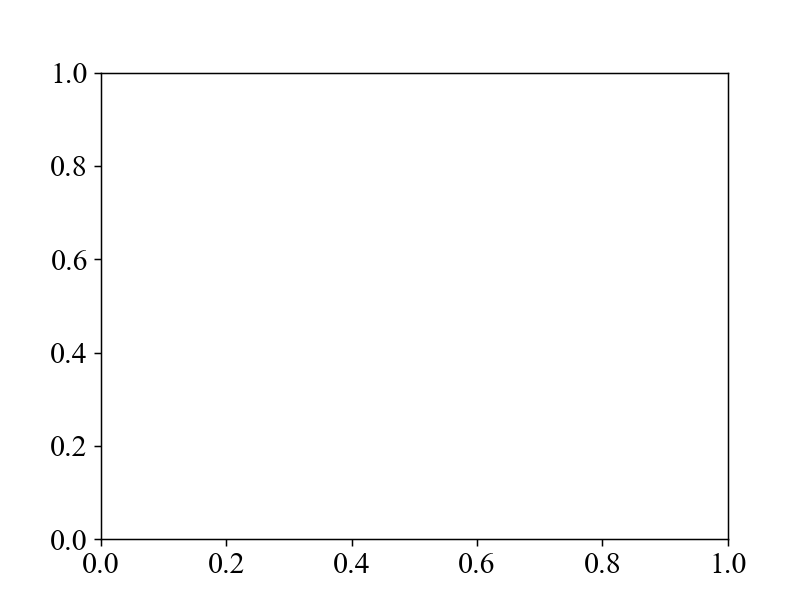

ValueError: x and y must have same first dimension, but have shapes (7,) and (14, 1)

In [2]:
start = 1
# mat = scipy.io.loadmat('../model/model_midi_new_zzz_thres_0.001_correct_param_357.mat')
# mat = scipy.io.loadmat('../model/model_midi_new_zzz_thres_0.001_correct_param_02468.mat')
# mat = scipy.io.loadmat('../model/model_midi_new_real_thres_20%_correct_param_2468.mat')
# mat = scipy.io.loadmat('../model/model_midi_new_real_thres_0.005_correct_param_2468.mat')
mat = scipy.io.loadmat('../model/model_midi_new_real_thres_0.001_correct_param_024_new50.mat')
# vel_list = np.linspace(0.01,0.08,15)
vel_list = np.linspace(0.01,0.08,8)
# pressure_list = [30,50,70]
# pressure_list = [0,20,40,60,80]
pressure_list = [0,20,40]
# pressure_list = [20,40,60,80]

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size': 16})

fig = plt.figure(20,figsize=(6, 3))
color_list = ['r','b','g','m','c']

# norm_on_vel = [(math.log(e)+7.1)*18 for e in mat['midi_all']]
norm_on_vel = [e[0] for e in mat['midi_all']]
for i in range(len(pressure_list)):
#     print(midi_down_list[i])
#     print(list(np.round(vel_list,3)))
    plt.plot(list(np.round(vel_list,3))[start:], norm_on_vel[8*(i):(8*(i+1))][start:],label = str(-pressure_list[i])+'kPa',marker = 'x', ms = 5, mec=color_list[i],mfc = color_list[i],mew=2,linestyle = 'dashed',color=color_list[i])
#     plt.plot(list(np.round(vel_list,3)), [e for e in mat['midi_all']][15*(i):(15*(i+1))],label = str(-pressure_list[i]),marker = 'x', ms = 5, mec=color_list[i],mfc = color_list[i],mew=2,linestyle = 'dashed',color=color_list[i])
    plt.legend(loc='lower right',fontsize=13)    

plt.xlabel('UR5 pressing velocity (m/s)', fontsize=15)
plt.ylabel('Vel on (m/s)', fontsize=15)
# plt.ylim([9,53])
# plt.grid(linestyle = '--', linewidth = 0.5)
plt.title('(a)',y=-0.4)
fig.savefig('model_midi.eps',bbox_inches = 'tight', format='eps')
plt.savefig("new figs/model_midi_zzz_ori.jpg",bbox_inches = 'tight')
plt.show()

fig = plt.figure(21,figsize=(6, 4.5))
# norm_ht = [(math.log(e)-0.2)*2.8 for e in mat['hold_time_all']]
# norm_ht = [(e-0.2)*2.8-0.5 for e in mat['hold_time_all']]
norm_ht = [e for e in mat['hold_time_all']]
for i in range(len(pressure_list)):
#     print(midi_down_list[i])
#     print(list(np.round(vel_list,3)))
    plt.plot(list(np.round(vel_list,3))[start:], norm_ht[15*(i):(15*(i+1))][start:],label = str(-pressure_list[i])+'kPa',marker = 'x', ms = 5, mec=color_list[i],mfc = color_list[i],mew=2,linestyle = 'dashed',color=color_list[i])
    plt.legend(loc='upper right')    

plt.xlabel('UR5 pressing velocity (m/s)',fontsize=15)
plt.ylabel('MIDI hold time (s)',fontsize=15)
# plt.grid(linestyle = '--', linewidth = 0.5
# plt.title('Predicted MIDI hold time')
plt.savefig("new figs/model_midi_ht_zzz_ori.jpg",bbox_inches = 'tight')
plt.show()

In [141]:
mat00 = scipy.io.loadmat('../paper_data/fig10/velon00.mat')
mat20 = scipy.io.loadmat('../paper_data/fig10/velon20.mat')
mat40 = scipy.io.loadmat('../paper_data/fig10/velon40.mat')

d_all = []
d_p = []
d_p1 = []
d_p2 = []
d_p3 = []

for mat,n in zip([mat00,mat20,mat40],['velon00','velon20','velon40']):
    d_p.append(mat[n][0::3])
    d_p.append(mat[n][1::3])
    d_p.append(mat[n][2::3])
    print(d_p)
    d_all.append(d_p)
    d_p = []
# print(d_all)

[array([[-0.00612418, -0.00480405, -0.00588012, -0.00991233, -0.01044396,
        -0.01500045, -0.01896   , -0.02015615, -0.02357632, -0.02248381,
        -0.02329952, -0.02542327, -0.03319155, -0.03576   , -0.03196   ,
        -0.04247702, -0.03846089, -0.04154873, -0.047121  , -0.0471402 ,
        -0.04241872, -0.04744782, -0.04921523, -0.04787482]]), array([], shape=(0, 24), dtype=float64), array([], shape=(0, 24), dtype=float64)]
[array([[-0.00712801, -0.00749466, -0.00819327, -0.0154988 , -0.01320003,
        -0.00942135, -0.04288405, -0.04034004, -0.03977071, -0.04834651,
        -0.04981051, -0.04984375, -0.05226667, -0.05158945, -0.05402036,
        -0.05299471, -0.05380829, -0.05300691, -0.05233478, -0.05355862,
        -0.05152017, -0.05121985, -0.05183099, -0.05189713]]), array([], shape=(0, 24), dtype=float64), array([], shape=(0, 24), dtype=float64)]
[array([[-0.00896411, -0.00837613, -0.00724397, -0.02658888, -0.02683934,
        -0.02055224, -0.0479    , -0.04369621, -0.

<IPython.core.display.Javascript object>


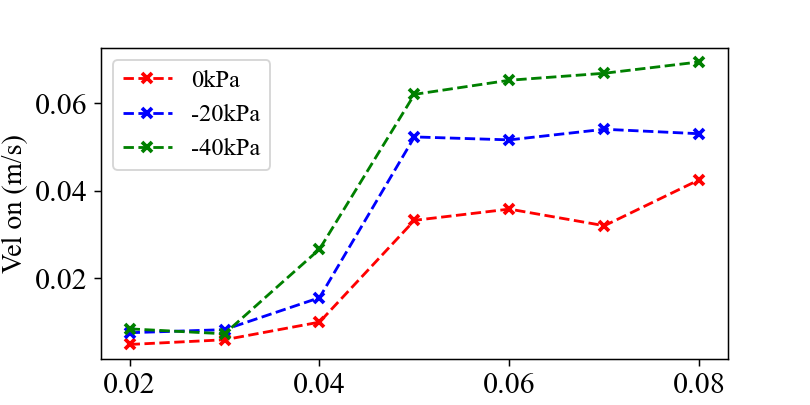

In [212]:
start = 1
vel_list = np.linspace(0.01,0.08,8)
pressure_list = [0,20,40]

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size': 16})

fig = plt.figure(40,figsize=(6, 3))
color_list = ['r','b','g','m','c']

# norm_on_vel = [(math.log(e)+7.1)*18 for e in mat['midi_all']]
# norm_on_vel = [e[0] for e in mat['midi_all']]
itr = 0
for i,d in zip(range(len(pressure_list)),d_all):
    d[0][0] = [abs(e) for e in d[0][0]]
    if i!=20:
        d[0][0][5]=d[0][0][8+5]
    d[0][0][6]=d[0][0][8+6]
    d[0][0][7]=d[0][0][8+7]
    d[0][0][4]=d[0][0][8+4]
    if i==20:
        d[0][0][6]=d[0][0][16+6]
    plt.plot(list(np.round(vel_list,3))[start:], d[0][0][(itr*8):((itr+1)*8)][start:],label = str(-pressure_list[i])+'kPa',marker = 'x', ms = 5, mec=color_list[i],mfc = color_list[i],mew=2,linestyle = 'dashed',color=color_list[i])

# itr = 1
# for i,d in zip(range(len(pressure_list)),d_all):
#     d[0][0] = [abs(e) for e in d[0][0]]
#     plt.plot(list(np.round(vel_list,3))[start:], d[0][0][(itr*8):((itr+1)*8)][start:],label = str(-pressure_list[i])+'kPa',marker = 'x', ms = 5, mec=color_list[i],mfc = color_list[i],mew=2,linestyle = '-',color=color_list[i])
# itr = 2
# for i,d in zip(range(len(pressure_list)),d_all):
#     d[0][0] = [abs(e) for e in d[0][0]]
#     plt.plot(list(np.round(vel_list,3))[start:], d[0][0][(itr*8):((itr+1)*8)][start:],label = str(-pressure_list[i])+'kPa',marker = 'x', ms = 5, mec=color_list[i],mfc = color_list[i],mew=2,linestyle = 'dotted',color=color_list[i])


plt.legend(loc='upper left',fontsize=13)   
plt.xlabel('UR5 pressing velocity (m/s)', fontsize=15)
plt.ylabel('Vel on (m/s)', fontsize=15)
# plt.ylim([9,53])
# plt.grid(linestyle = '--', linewidth = 0.5)
plt.title('(b)',y=-0.4)
plt.savefig("new figs/gt_midi_zzz_ori.jpg",bbox_inches = 'tight')
plt.show()

In [213]:
fig.savefig('gt_midi.eps',bbox_inches = 'tight', format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [155]:
print(norm_on_vel)

[0.004427915109412716, 0.013531937474426867, 0.02080709570475886, 0.026393085511847592, 0.031119059776848642, 0.03512136241067606, 0.03857607914294157, 0.04177536343173433, 0.04506056852643793, 0.04794397192037659, 0.05039569155083239, 0.052388257381693434, 0.05517500682018263, 0.05774653908648033, 0.06009652774555682, 0.013381189232001189, 0.022788218504459466, 0.02954277967835402, 0.03494227257198759, 0.03949042905688452, 0.043320181695419464, 0.04686647238029027, 0.05060691160258955, 0.053767306436529064, 0.05632588618254106, 0.05986824236843329, 0.061356789880816394, 0.06415122857939665, 0.06664395371509574, 0.06883135324867239, 0.013196031028909518, 0.023769590557095502, 0.031219875831286267, 0.037007818321470404, 0.042315298565409824, 0.046366261659736355, 0.05004165757376412, 0.053907980383585685, 0.05710334157645416, 0.05960258491966377, 0.06321891956911083, 0.06650142504550839, 0.06944468989313274, 0.07204382680684797, 0.07429442660937101, 0.012250474135489658, 0.0239951315188

In [113]:
mat = scipy.io.loadmat('../paper_data/zzz/denseData357.mat')
dt = [10289,10843,10941]
dt = [e/120/100001 for e in dt]
thre = [0.0080,0.00831,0.00845]
thre = [e - 0.001 for e in thre]

def get_seq_derivative(seq,dt):
    der = []
    
    for i in range(1,len(seq)):
        der.append((seq[i]-seq[i-1])/dt)
    
    der.insert(0,der[0])
    
    return der

nzzz = mat['nzzz30']
vf = gaussian_filter1d(get_seq_derivative(nzzz,dt[0]), sigma=64, truncate=500)
fig = plt.figure(31,figsize=(6, 4.5))
plt.plot(vf[5000:10000])